In [1]:
!unzip archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


## 1. Import Liraries and Extract Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.use

In [2]:
df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')

In [3]:
df.head(5)

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


## 2. Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [5]:
df.describe()

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,84.190200,107.043246,-6.404184,5720.384481
std,2033.283305,24.559481,39.117061,0.358316,0.322898,1537.974298
min,0.000000,0.000000,23.725000,106.816666,-6.914744,2603.900000
25%,1760.500000,9.000000,46.150000,106.816666,-6.914744,4509.700000
50%,3521.000000,29.000000,91.455000,106.816666,-6.200000,5885.100000
75%,5281.500000,55.000000,116.805000,107.609810,-6.200000,6994.650000
max,7042.000000,72.000000,154.375000,107.609810,-6.200000,8450.000000


In [6]:
def plot_numeric_distribution(data, column, ax):
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

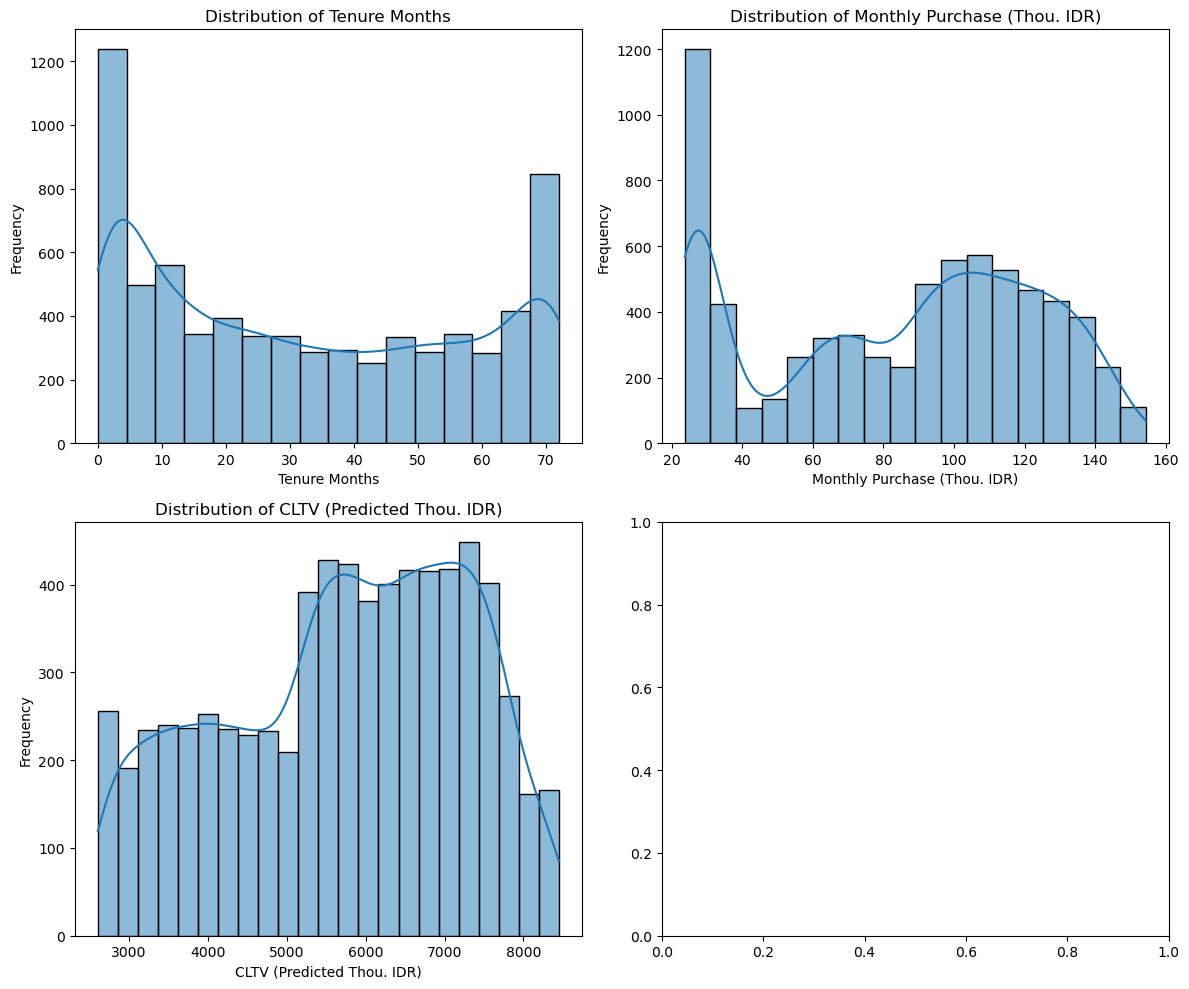

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
plot_numeric_distribution(df, 'Tenure Months', ax[0, 0])
plot_numeric_distribution(df, 'Monthly Purchase (Thou. IDR)', ax[0, 1])
plot_numeric_distribution(df, 'CLTV (Predicted Thou. IDR)', ax[1, 0])

if len(df.columns) % 2 != 0:
    fig.delaxes(ax[-1, -1])

plt.tight_layout()
plt.show()

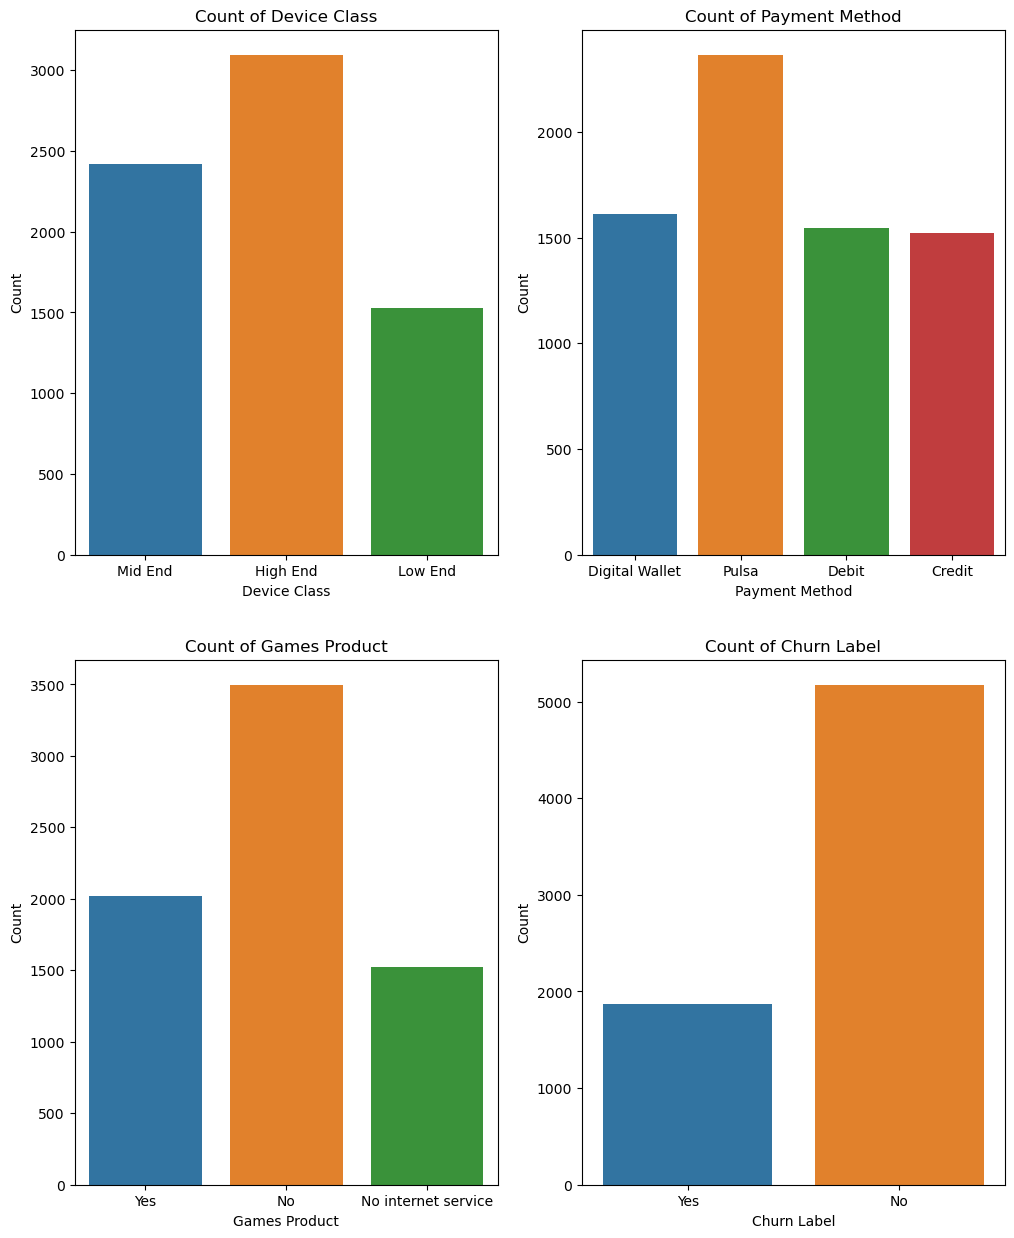

In [8]:
def plot_categorical_distribution(data, column, ax):
    sns.countplot(x=column, data=data, ax=ax)
    ax.set_title(f'Count of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

fig, ax = plt.subplots(2, 2, figsize=(12, 15))  # Adjust the size and layout as needed
plot_categorical_distribution(df, 'Device Class', ax[0, 0])
plot_categorical_distribution(df, 'Payment Method', ax[0, 1])
plot_categorical_distribution(df, 'Games Product', ax[1, 0])
plot_categorical_distribution(df, 'Churn Label', ax[1, 1])

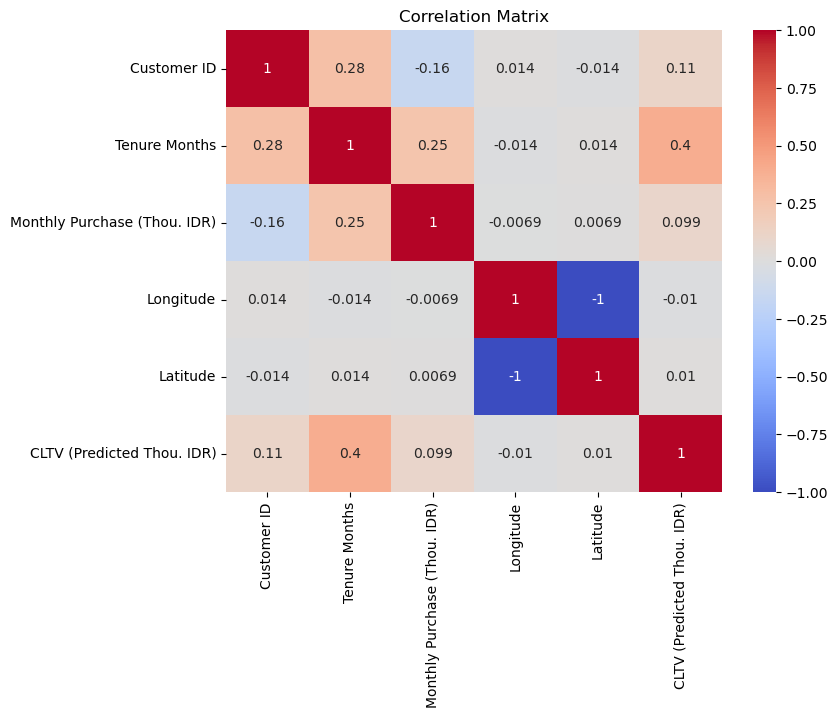

In [9]:
# Visualize correlations
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- There is a moderate positive correlation between <b>Tenure Months</b> and <b>CLTV (Predicted Thou. IDR)</b>, suggesting that customers who have been with the company longer tend to have a higher predicted lifetime value.
- <b>Monthly Purchase (Thou. IDR)</b> also has a positive correlation with <b>CLTV (Predicted Thou. IDR)</b>, indicating that customers who spend more monthly are likely to have a higher lifetime value.
- The geographical coordinates (Longitude and Latitude) do not show significant correlations with other variables, which might imply that location being only 2 points based on their latitude and longitude (Jakarta, Bandung) is not a strong predictor of customer behavior in this dataset.

In [10]:
# Visualize the distribution of numeric variables segmented by churn
def plot_numeric_distribution_churn(data, column, ax):
    sns.histplot(data=data, x=column, hue='Churn Label', ax=ax)
    ax.set_title(f'Distribution of {column} by Churn')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Visualize the distribution of categorical variables segmented by churn
def plot_categorical_distribution_churn(data, column, ax):
    sns.countplot(x=column, hue='Churn Label', data=data, ax=ax)
    ax.set_title(f'Count of {column} by Churn')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

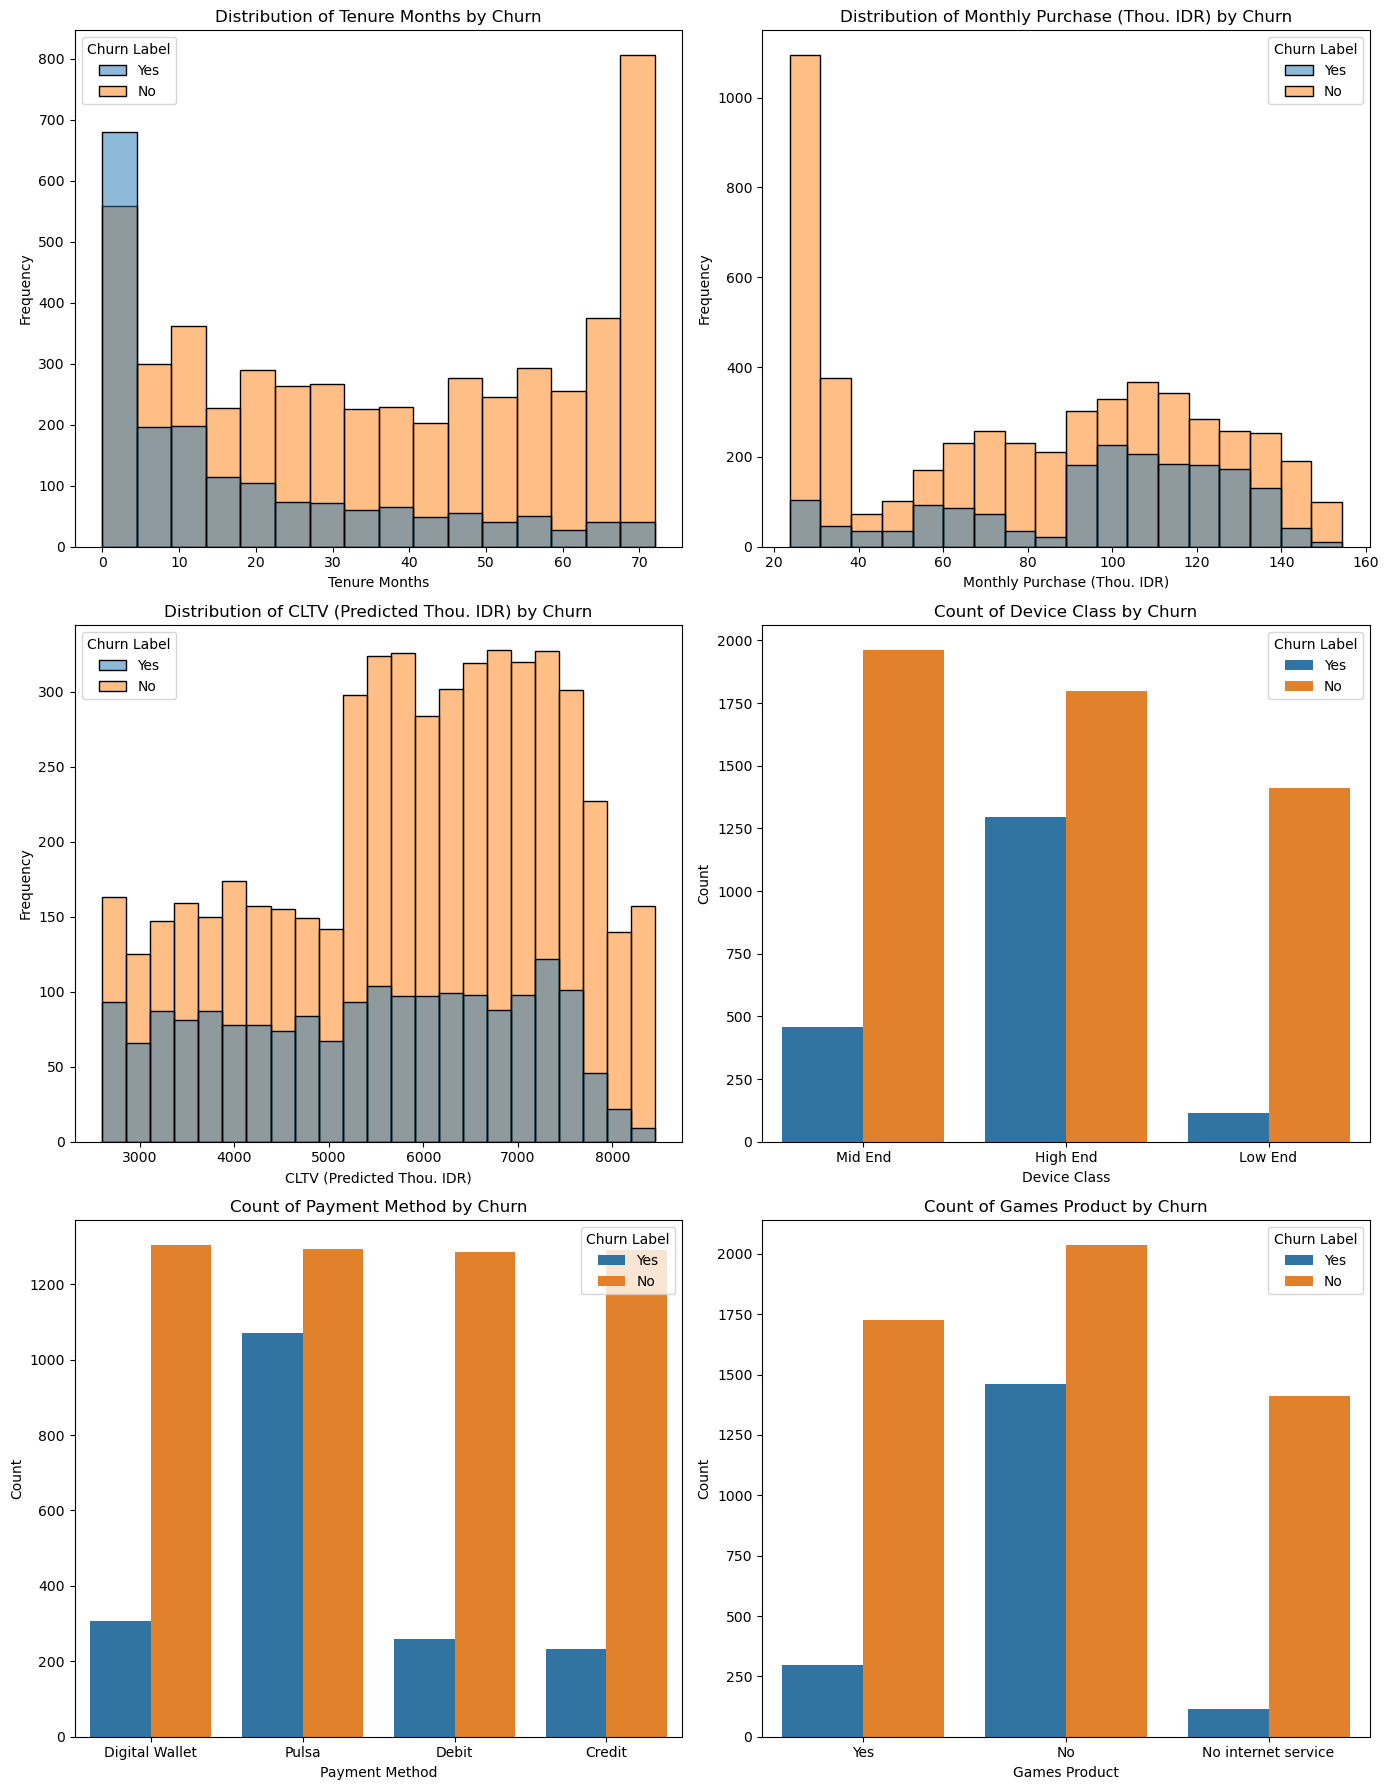

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(14, 18))  # Adjust the size and layout as needed
plot_numeric_distribution_churn(df, 'Tenure Months', ax[0, 0])
plot_numeric_distribution_churn(df, 'Monthly Purchase (Thou. IDR)', ax[0, 1])
plot_numeric_distribution_churn(df, 'CLTV (Predicted Thou. IDR)', ax[1, 0])


# Visualizing categorical variables - adjust according to your dataset
plot_categorical_distribution_churn(df, 'Device Class', ax[1, 1])
plot_categorical_distribution_churn(df, 'Payment Method', ax[2, 0])
plot_categorical_distribution_churn(df, 'Games Product', ax[2, 1])

plt.tight_layout()
plt.show()

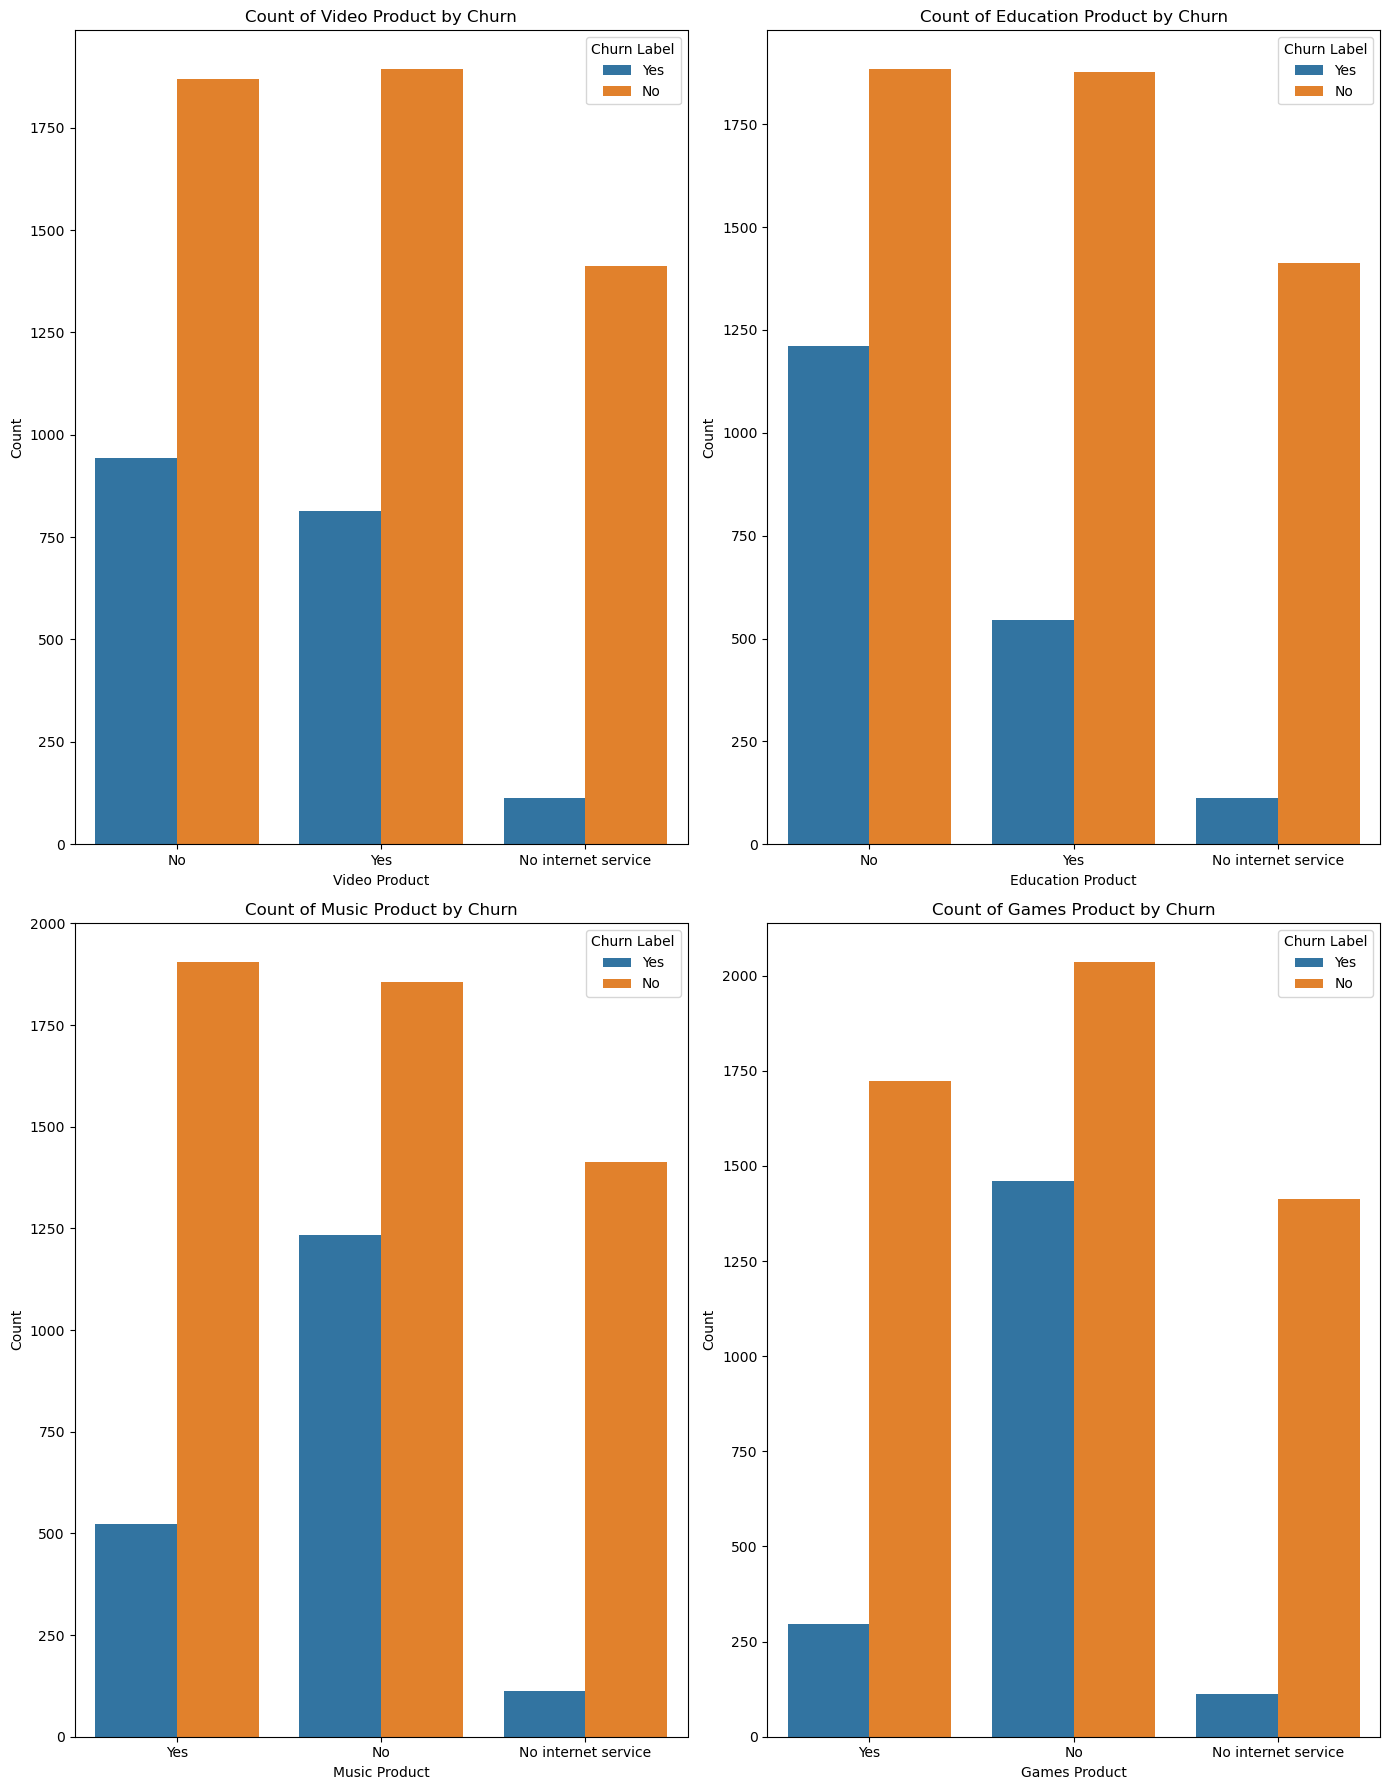

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(14, 18)) 

plot_categorical_distribution_churn(df, 'Video Product', ax[0, 0])
plot_categorical_distribution_churn(df, 'Education Product', ax[0, 1])
plot_categorical_distribution_churn(df, 'Music Product', ax[1, 0])
plot_categorical_distribution_churn(df, 'Games Product', ax[1, 1])

plt.tight_layout()
plt.show()

In [13]:
# Create a pivot table
pivot_table = pd.pivot_table(df, index='Payment Method', columns='Churn Label', aggfunc=len, fill_value=0)

# Display the pivot table
print(pivot_table[['Customer ID']])

               Customer ID      
Churn Label             No   Yes
Payment Method                  
Credit                1290   232
Debit                 1286   258
Digital Wallet        1304   308
Pulsa                 1294  1071


In [15]:
df[['Use MyApp', 'Churn Label']].value_counts(['Use MyApp', 'Churn Label'])

Use MyApp            Churn Label
Yes                  No             1914
No                   No             1847
No internet service  No             1413
No                   Yes             938
Yes                  Yes             818
No internet service  Yes             113
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [17]:
df['Churn Label'] = df['Churn Label'].replace({'Yes' : 1, 'No': 0})
df['Games Product'] = df['Games Product'].replace({'Yes' : 1, 'No': 0, 'No internet service': 2})
df['Music Product'] = df['Music Product'].replace({'Yes' : 1, 'No': 0, 'No internet service': 2})
df['Education Product'] = df['Education Product'].replace({'Yes' : 1, 'No': 0, 'No internet service': 2})
df['Video Product'] = df['Video Product'].replace({'Yes' : 1, 'No': 0, 'No internet service': 2})
df['Use MyApp'] = df['Use MyApp'].replace({'Yes' : 1, 'No': 0, 'No internet service': 2})
df['Call Center'] = df['Call Center'].replace({'Yes' : 1, 'No': 0})

In [18]:
df['Use MyApp'].unique()

array([0, 1, 2])

<Axes: >

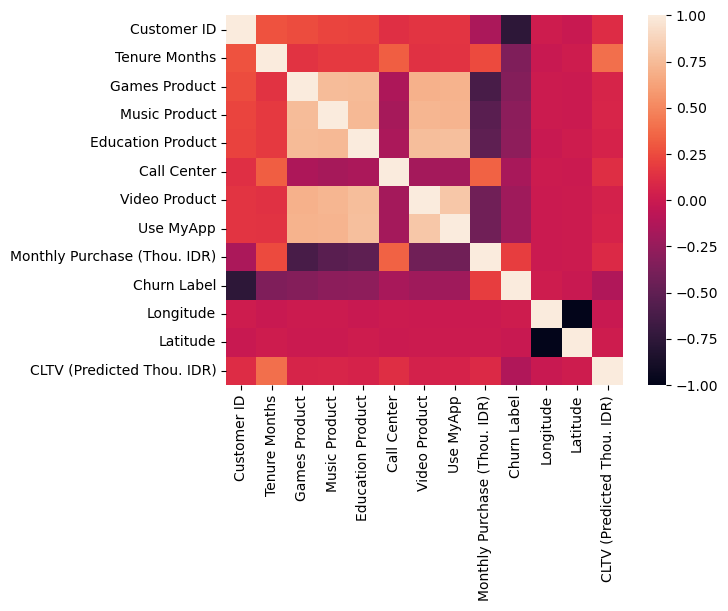

In [19]:
sns.heatmap(data=df.corr('pearson', numeric_only=True))

<Axes: xlabel='CLTV (Predicted Thou. IDR)', ylabel='Count'>

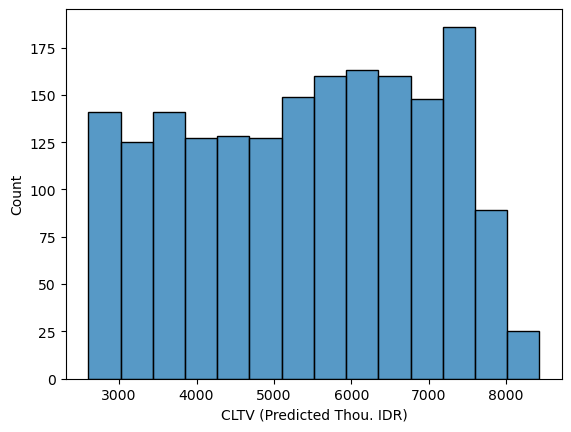

In [20]:
sns.histplot(data=df[df['Churn Label'] == 1], x='CLTV (Predicted Thou. IDR)')

<Axes: xlabel='CLTV (Predicted Thou. IDR)', ylabel='Count'>

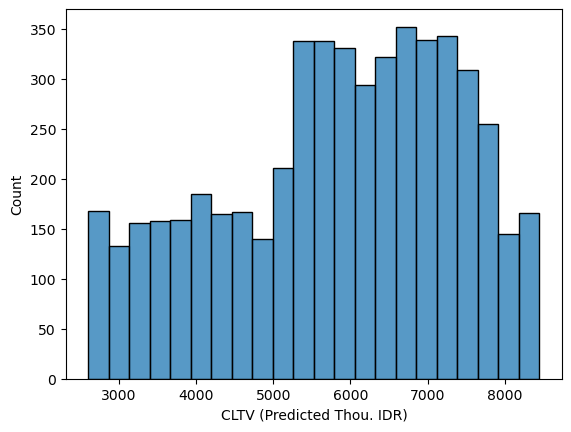

In [21]:
sns.histplot(data=df[df['Churn Label'] == 0], x='CLTV (Predicted Thou. IDR)')

<Axes: xlabel='Tenure Months', ylabel='CLTV (Predicted Thou. IDR)'>

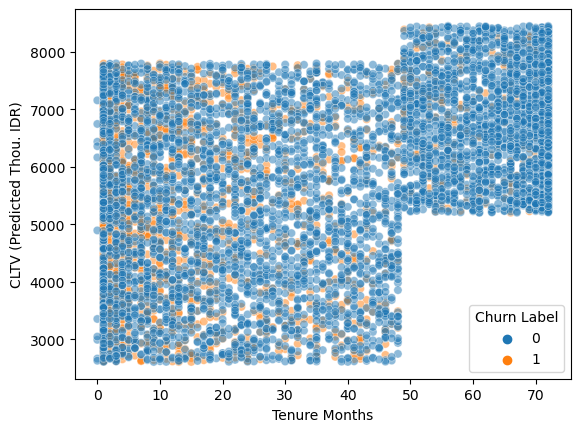

In [22]:
sns.scatterplot(data=df, x='Tenure Months', y='CLTV (Predicted Thou. IDR)', hue='Churn Label', alpha=0.5)

<Axes: xlabel='Tenure Months', ylabel='CLTV (Predicted Thou. IDR)'>

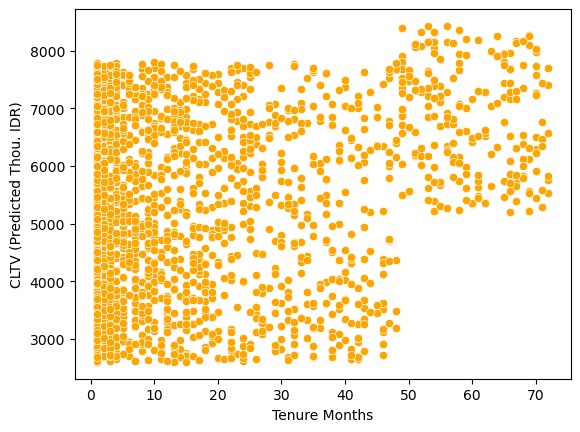

In [23]:
sns.scatterplot(data=df[df['Churn Label'] == 1], x='Tenure Months', y='CLTV (Predicted Thou. IDR)', color='Orange')

<Axes: xlabel='Tenure Months', ylabel='CLTV (Predicted Thou. IDR)'>

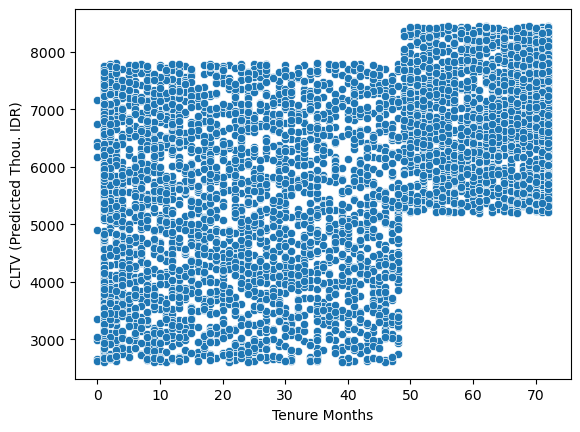

In [24]:
sns.scatterplot(data=df[df['Churn Label'] == 0], x='Tenure Months', y='CLTV (Predicted Thou. IDR)')

<Axes: xlabel='Monthly Purchase (Thou. IDR)', ylabel='Count'>

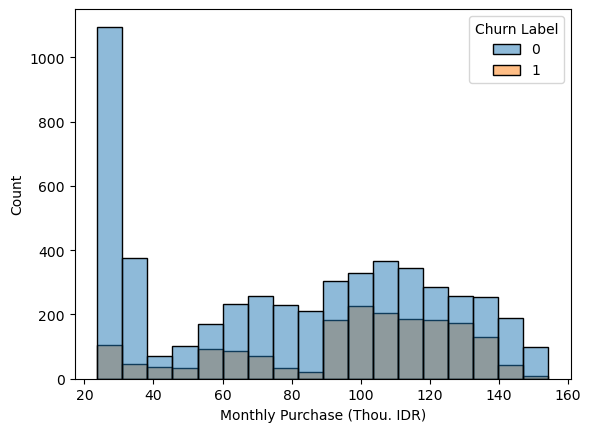

In [25]:
sns.histplot(data=df, x='Monthly Purchase (Thou. IDR)', hue='Churn Label')

<Axes: xlabel='Tenure Months', ylabel='Count'>

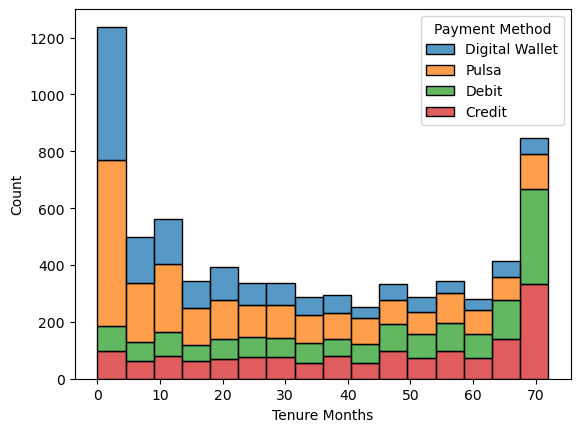

In [26]:
sns.histplot(data=df, x='Tenure Months', hue='Payment Method', multiple='stack')

In [27]:
def grouping_tenure_months(x) :
  if x > 50 :
    return 2
  elif x > 30 :
    return 1
  else:
    return 0

df['Tenure Months Groups'] = df['Tenure Months'].apply(grouping_tenure_months)

In [28]:
def group_values(series):
    bins = [0, 40, 80, 120, 160]
    labels = ['0-40', '40-80', '80-120', '120-160']

    grouped_series = pd.cut(series, bins=bins, labels=labels, right=False, include_lowest=True)

    return grouped_series

df['monthly_purchase_grouped'] = group_values(df['Monthly Purchase (Thou. IDR)'])

<Axes: xlabel='monthly_purchase_grouped', ylabel='count'>

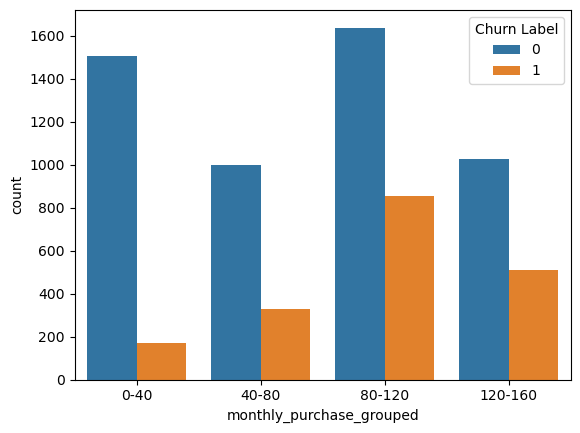

In [29]:
sns.countplot(data=df, x='monthly_purchase_grouped', hue='Churn Label')

<p> Apply <b>Preprocessing</b> for Monthly Purchase column (Grouping Values) </p>

### Customer Segmetation Analysis

In [37]:
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

drop_columns = ['Customer ID', 'Churn Label', 'churn_bin_encoded', 'Tenure Months Groups'
                ,'Latitude', 'Longitude', 'Location', 'Segment', 'monthly_purchase_grouped']
X = df.drop(drop_columns, axis=1)
y = df['Churn Label']

columns = X.columns

label_encoders = {}
# standard_scalers = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])
    

label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize the XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False, enable_categorical=True, eval_metric='logloss')

# Train the model
xgb_clf.fit(X_train, y_train)
# pipeline.fit(X_train, y_train)

# Predict the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[674  91]
 [143 149]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       765
           1       0.62      0.51      0.56       292

    accuracy                           0.78      1057
   macro avg       0.72      0.70      0.71      1057
weighted avg       0.77      0.78      0.77      1057



Menggunakan K-Means Clustering untuk melakukan segmentasi customer menjadi beberapa kelompok(segment)

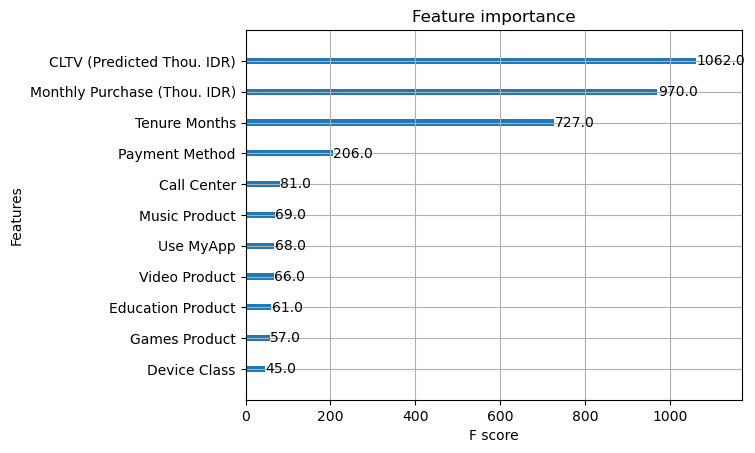

In [40]:
plot_importance(xgb_clf)
plt.show()

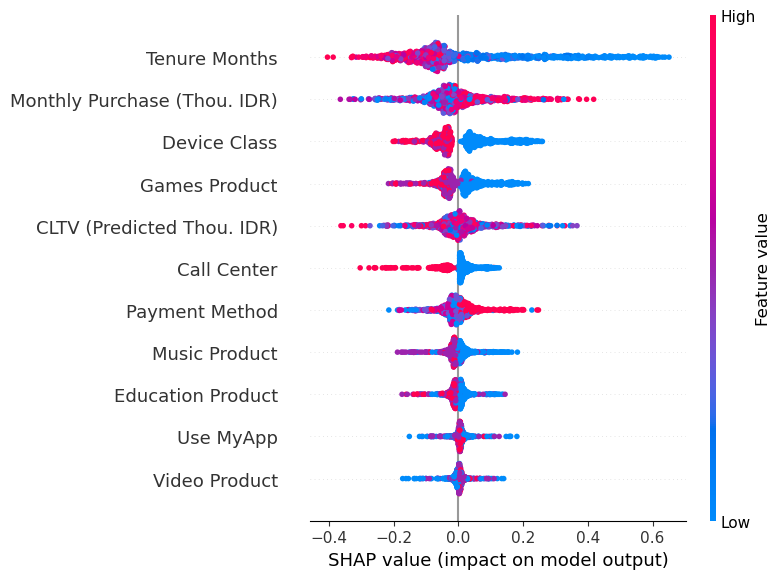

In [44]:
shap.summary_plot(shap_values, X_test, max_display=X_test.shape[1])

### Feature Importance
Based on the F-Score and the Shap Values of the features, customer value-related features (CLTV and Monthly Purchase) and customer relationship duration (Tenure) are the top factors influencing churn predictions in this model.  Engagement with various services/products and customer service interactions (Call Center) also play a role but not too significant.
Based on our findings, we can assume that CLTV was constructed with Tenure Months and Monthly Purchase being the variables to formulate the value of CLTV. Therefore, CLTV and Tenure Months will be used further to be the main parameters to do the segmentation of the customers.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

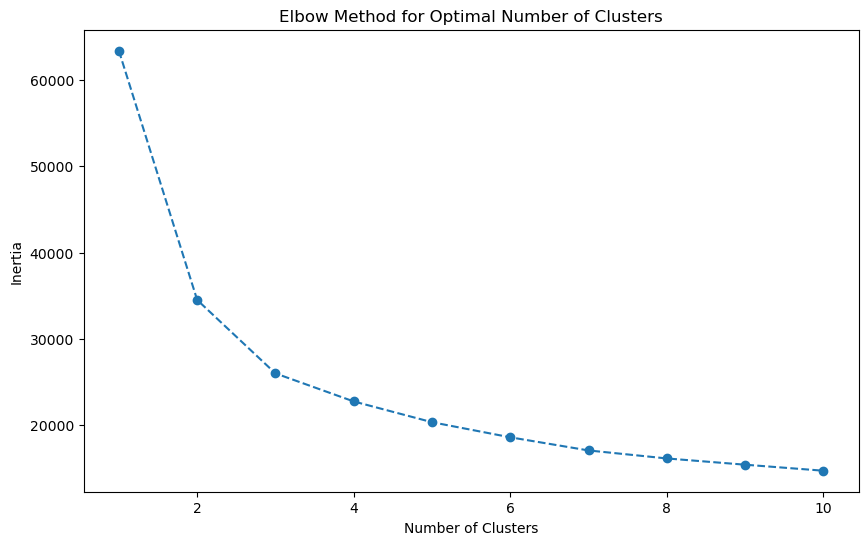

In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# Copy the data to avoid changes to the original dataframe
segmentation_data = df.copy()

# Encoding categorical variables with LabelEncoder
binary_features = ['Games Product', 'Music Product', 'Education Product', 'Video Product', 'Use MyApp', 'Call Center']
label_encoder = LabelEncoder()
for col in binary_features:
    segmentation_data[col] = label_encoder.fit_transform(segmentation_data[col])

# Selecting relevant features for clustering
features_for_clustering = ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'] + binary_features

# Scaling the data
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data[features_for_clustering])

# Finding the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(segmentation_data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [31]:
# Choose the number of clusters (k) based on the Elbow plot, and fit the final K-means model
k = 3
kmeans_final = KMeans(n_clusters=k, random_state=42)
kmeans_final.fit(segmentation_data_scaled)

# Assign the cluster labels to the original dataframe
df['Segment'] = kmeans_final.labels_

# Now you can analyze the segments
# For example, calculate average values for each segment:
segmentation_analysis = df[['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)', 'Segment']].groupby('Segment').mean()

segmentation_analysis

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Tenure Months,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR)
Segment,,,
0,16.058638,89.612705,5106.803279
1,30.547182,27.402952,5686.696658
2,55.623454,113.809456,6572.276674


In [35]:
df[['Churn Label', 'Segment']].groupby('Segment').mean()['Churn Label']

Segment
0    0.444515
1    0.074050
2    0.147548
Name: Churn Label, dtype: float64

#### Suggested next Action :
For segments with low tenure, consider strategies to boost early engagement.
For segments with high spending but also high churn, look into customer satisfaction and service quality issues.

Segment 0: Low Tenure and Low CLTV

Strategy: Improve customer onboarding and early engagement. Customers in this segment are newer and may benefit from education on the full range of services and products available. Implementing a welcome program that guides them through the use of your services might increase their tenure and, eventually, their CLTV.
The low tenure suggests these customers haven't fully experienced the value of the services(Games Product, Education Product, Video Product, Music Product), which might contribute to churn. Enhancing their early experience could lead to increased retention.

Segment 1: Moderate Tenure and Moderate CLTV

Strategy: Offer loyalty programs or incentives for continued service. These customers have been with the company longer than Segment 0 and are spending a moderate amount, indicating some level of satisfaction. Loyalty programs could reinforce their positive experience and encourage continued business.
Customers with longer tenure are likely more familiar with and reliant on the services provided. Loyalty programs tend to work well with customers who have already integrated a service into their routines.


Segment 2: High Tenure and High CLTV

Strategy: Personalize service and product offerings to further increase customer satisfaction and retention. One of the example of product offerings might be package bundling with add ons (Games Product, Video Product, Music Product, Education Product).  High-value customers often expect a higher level of service and personalized attention. This could include access to premium support or early access to new features and services.
The highest CLTV and tenure suggest these customers are the most valuable and loyal. Retaining these customers is typically more cost-effective than acquiring new ones, and personalized service can help maintain their loyalty.

In [41]:
import shap

# Fits the explainer
explainer = shap.Explainer(xgb_clf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 1058it [02:27,  6.84it/s]                                                                                
